####  **Exemplo regressão linear simples com dataset usando LinearRegression()**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets
df = pd.read_csv('iris.csv', header=(0))
print("Número de linhas e colunas:",df.shape)
df.head(25)

Número de linhas e colunas: (150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
# excluir linhas com NaN
df = df.dropna()
df.head(25)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


3.418946836103816
[-0.0618848]
O modelo é: y = 3.419 + (-0.062)x


/tmp/ipython-input-4030138520.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("O modelo é: y = %.3f + (%.3f)x" %(modelo.intercept_, modelo.coef_))


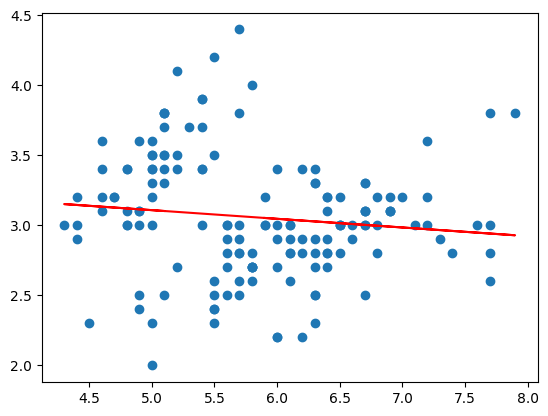

In [ ]:
# y é a coluna 1
y = df.iloc[:,1]
# x é a coluna 0
x = df.iloc[:,0]
X = np.array(x).reshape(-1, 1)
y = np.array(y)
modelo = LinearRegression().fit(X, y)
print(modelo.intercept_)
print (modelo.coef_)
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
print("O modelo é: y = %.3f + (%.3f)x" %(modelo.intercept_, modelo.coef_))

#### **Exemplo regressão linear simples com dataset usando sm.ols**

#### **Construindo o modelo linear, `sm.ols(formula = , data= )**

A função `sm.ols()` requer um conjunto de dados e o parâmetro `formula` (*patsy* fórmula, um formato bastante empregado em modelos) indicará as variáveis objetivo e preditoras a serem empregadas.

````
                                                              formula = 'y ~ x'
````
significa

$$ y \leftarrow  x $$

para um modelo

$$ \widehat y = a_0 + a_1 x $$

A preparação de dados na maior parte dos casos difere caso a caso, mas um princípio geral é de que precisamos preparar o dado da melhor forma para sejam aplicados os modelos.

Neste caso a api statsmodels.formula.api não suporta atributos nomeados com '.' e precisamos, então, adequar o nomde dos atributos antes de aplicar o modelo.

In [ ]:
df = pd.read_csv('iris.csv', header=(0))
print("Número de linhas e colunas:",df.shape)
df.head(25)

Número de linhas e colunas: (150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
df.columns = [ x.replace('.','') for x in df.columns ]

In [ ]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
import seaborn as sns
import statsmodels.formula.api as sm
model = sm.ols(formula='sepalwidth ~ sepallength', data=df)

In [ ]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             sepalwidth   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Fri, 15 Aug 2025   Prob (F-statistic):              0.152
Time:                        11:50:48   Log-Likelihood:                -86.732
No. Observations:                 150   AIC:                             177.5
Df Residuals:                     148   BIC:                             183.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.4189      0.254     13.484      

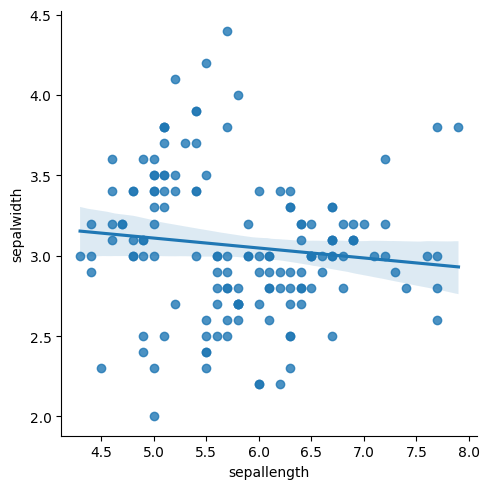

In [ ]:
sns.lmplot(x='sepallength',y='sepalwidth',data=df)
plt.show()

# Regressão Linear Múltipla

No modelo linear mais geral o valor de variável objetivo, ou dependente, $y$ é obtido a partir de uma combinação linear de um conjunto de variáveis preditoras, ou dependentes, $X$.

$$  \widehat y = a_0 + a_{1} x_{1} + a_{2} x_{2} + ... + a_{n} x_{n} $$

Agora, a cada variável preditora corresponde um coeficiente $a_n$, havendo um coeficiente independente que corresponte ao valor de $\widehat y$ para $X_i=0$ (*intercept*).

Os coeficientes $a_n$ são obtidos do mesmo modo que na regressão simples, minimizando-se o erro  entre os valores de $y$  nos dados e os valores estimados $\widehat y$, e podemos escrever:

$$ \min_{a_i}\sum (y_i - \widehat y_i )^2 = $$

$$ \min_{a_i} \sum (y_i - (a_0 + a_{1} x_{1} + ... + a_{n} x_{n}) )^2 $$

Não há, entretanto, nenhuma fórmula ou expressão para obtermos de forma algébrica os valores de $a_i$ que são obitidos, de modo geral, aplicando-se algum método de otimização, como o  método de mínimos quadrados, sendo o erro uma função convexa que garante a existência de um único ponto de mínimo.

> **Para quaisquer conjuntos de dados $(X, y)$ sempre é possível se calcular os coeficientes de uma regressão linear. Esses coeficientes fornecem sempre a melhor reta ou *hiperplano* que se ajusta os dados. A pergunta é: seria esse ajuste é suficientemente bom?**

Na maioria dos casos, estamos interessados na influência de várias variáveis em uma variável alvo.

## Regressão Múltipla: Adicionando Mais Variáveis ao Modelo

Sendo o ajuste do modelo anterior parcial vamos buscar aprimorar o mdeolo adicionando mais variáveis preditoras. Vamos, entretanto, ainda nos atermos a entradas numéricas no modelo.

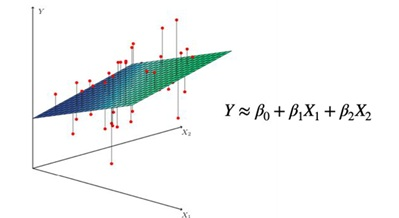

Por exemplo, podemos analisar o efeito do investimento em TV, rádio e jornal na quantidade de itens vendidos, ao invés de considerar apenas TV.

Suponha que temos d preditores distintos para a variável Y. Então, o modelo de regressão linear múltipla é:

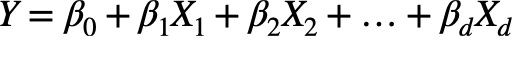

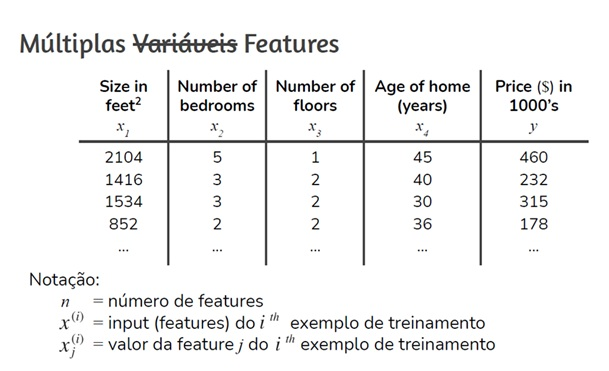

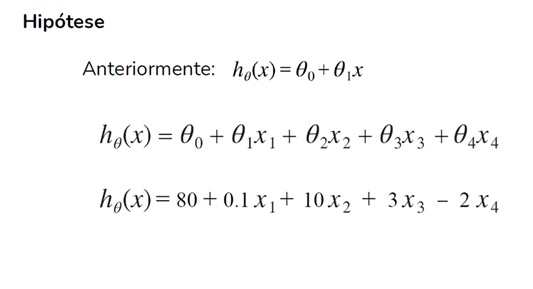

# Exemplo Regressão Múltipla: Estimando o Preço de Veículos

Vamos empregar agora um conjunto de dados mais interessante e estimar o Preço de veículos com base em suas características. Vamos empregar o seguinte conjunto de dados:

In [ ]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv",index_col=0)
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
rownames,,,,,,,,,,,,,,,,,,,,,
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Preparação dos Dados

A Fase de Preparação dos Dados difere caso a caso, mas um princípio geral é nesta fase precisamos preparar o dado da melhor forma para que sejam aplicados os modelos. É uma boa prática, senão obrigatório, uma exploração dos dados para que você conheça os dados antes de aplicar os modelos.

Aqui a api statsmodels.formula.api não suporta nome de atributos com '.' e precisamos adequar o nomde dos atributos antes de aplicar o modelo.

In [ ]:
df.columns = [ x.replace('.','') for x in df.columns ]


In [ ]:
df.head()

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
rownames,,,,,,,,,,,,,,,,,,,,,
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
model = sm.ols(formula="Price ~ Passengers +	Length +	Wheelbase	+ \
              Width	+ Turncircle + Luggageroom + \
              Weight + Horsepower + EngineSize + \
              RPM + Wheelbase ", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     18.94
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           2.32e-16
Time:                        14:29:11   Log-Likelihood:                -251.04
No. Observations:                  82   AIC:                             524.1
Df Residuals:                      71   BIC:                             550.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      53.1792     28.749      1.850      

A inspeção visual agora não é mais possível mas podemos analisar as métricas do modelo.  

$ {R}^2 = 0.727 $

$ p-values > 0.05 $

Um modelo melhor pode ser obtido. Vamos empregar agora somente os estimadores relevantes.

In [ ]:
model = sm.ols(formula="Price ~ Wheelbase	+ Width	+ Horsepower", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     69.43
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           3.13e-23
Time:                        14:30:09   Log-Likelihood:                -286.29
No. Observations:                  93   AIC:                             580.6
Df Residuals:                      89   BIC:                             590.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2519     12.263      1.081      0.2

## Análise Visual dos Resultados

In [ ]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv",index_col=0)
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
rownames,,,,,,,,,,,,,,,,,,,,,
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
df.columns = [ x.replace('.','') for x in df.columns ]

In [ ]:
list(df.columns)

['Manufacturer',
 'Model',
 'Type',
 'MinPrice',
 'Price',
 'MaxPrice',
 'MPGcity',
 'MPGhighway',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Revpermile',
 'Mantransavail',
 'Fueltankcapacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Rearseatroom',
 'Luggageroom',
 'Weight',
 'Origin',
 'Make']

In [ ]:
y = df.loc[:,'Price']

x = df.loc[:,['Wheelbase', 'Width','Horsepower']]

#X = np.array(x).reshape(-1, 1)
y = np.array(y)

In [ ]:
from sklearn.linear_model import LinearRegression

# modelo de regressão linear múltipla
modelo = LinearRegression().fit(x, y)

y_pred = modelo.predict(x)


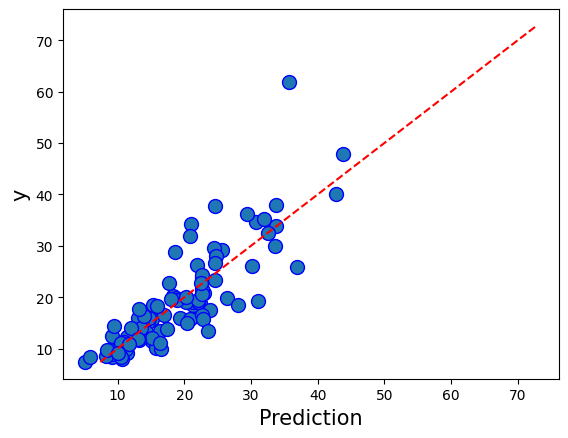

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
l = plt.plot(y_pred, y, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y), 1.2*max(y),(max(y)-min(y))/10)

yl = xl
plt.plot(xl, yl, 'r--')
plt.show(True)


In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print('R2:', R2)

R2: 0.7006331853649603


In [ ]:
print(modelo.coef_)

[ 0.65781233 -1.22876709  0.16080377]


###  Exemplo com o dataset iris.csv

In [ ]:
df = pd.read_csv('iris.csv', header=(0))

In [ ]:
# eliminar o ponto no nome das columas para usar o sm.ols
df.columns = [ x.replace('.','') for x in df.columns ]

In [ ]:
model = sm.ols(formula="petalwidth ~ sepallength+sepalwidth+petallength", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             petalwidth   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     734.4
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           7.83e-88
Time:                        23:42:49   Log-Likelihood:                 36.751
No. Observations:                 150   AIC:                            -65.50
Df Residuals:                     146   BIC:                            -53.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2403      0.178     -1.347      

$$ \bar{R}^2 = 0.938 $$
$$ p-values > 0.05 $$

Vamos retirar o intercept do modelo.

In [ ]:
model = sm.ols(formula="petalwidth ~ sepallength+sepalwidth+petallength-1", data=df)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:             petalwidth   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2671.
Date:                Thu, 14 Aug 2025   Prob (F-statistic):                   5.99e-128
Time:                        23:45:45   Log-Likelihood:                          35.824
No. Observations:                 150   AIC:                                     -65.65
Df Residuals:                     147   BIC:                                     -56.62
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

**Coeficiente de Correlação Linear de um Dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets
df = pd.read_csv('iris.csv', header=(0))
print("Número de linhas e colunas:",df.shape)
df.head(25)

Número de linhas e colunas: (150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


<Axes: >

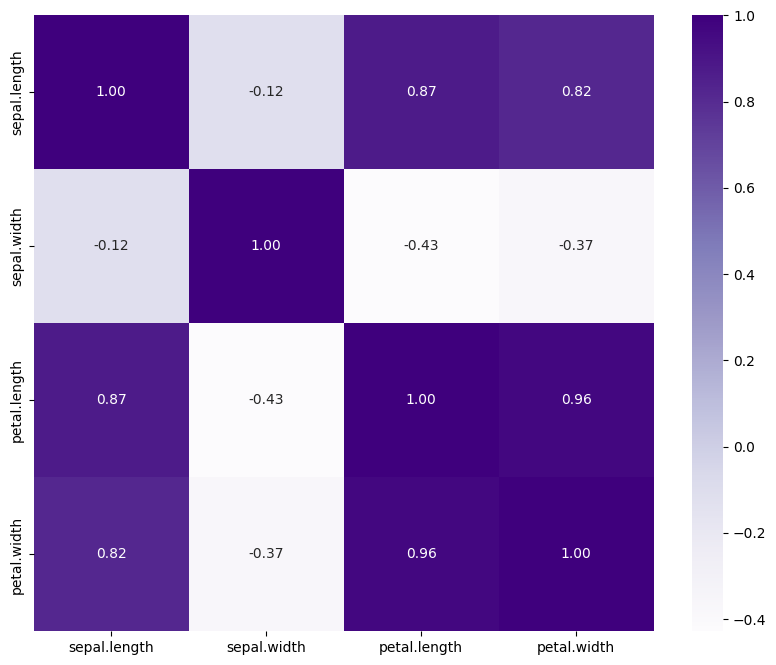

In [3]:
import seaborn as sns

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Purples')